# Лабораторная работа №2

## Стрекнев Д. СКБ172

### Прямой поиск 

In [1]:
def linear_search(array,key,value):
    # принимает массив объектов (array), атрибут (key) и значение атрибута (value)
    # возвращает массив индексов объектов (s) с указанным значением атрибута
    s=[]
    for i in range(len(array)):
        if (getattr(array[i],key) == value):
            s.append(i)
    return s

### Бинарный поиск в заранее отсортированном массиве

In [2]:
def binary_search(array,key,value):
    # принимает массив объектов (array), атрибут (key) и значение атрибута (value)
    # возвращает массив индексов объектов array (s) с указанным значением атрибута
    s=[]
    i=0
    j = len(array) - 1
    m = int(j // 2)
    while getattr(array[m], key) != value and i <= j:
        if value > getattr(array[m], key):
            i = m + 1
        else:
            j = m - 1
        m = int((i + j) // 2)
    if i <= j:
        s.append(m)
        bound = m + 1
        bound = m + 1
        while bound < len(array) and getattr(array[bound], key) == value:
            s.append(bound)
            bound += 1
        bound = m - 1
        while bound >= 0 and getattr(array[bound], key) == value:
            s.append(bound)
            bound -= 1
    return s

### Сортировка слиянием

In [3]:
def merge_sort(array):
    # принимает массив объектов (array) и сортирует его
    if len(array)>1:
        mid = len(array)//2
        lefthalf = array[:mid]
        righthalf = array[mid:]
        merge_sort(lefthalf)
        merge_sort(righthalf)
        i=0
        j=0
        k=0
        while i<len(lefthalf) and j<len(righthalf):
            if lefthalf[i]<righthalf[j]:
                array[k]=lefthalf[i]
                i=i+1
            else:
                array[k]=righthalf[j]
                j=j+1
            k=k+1
        while i<len(lefthalf):
            array[k]=lefthalf[i]
            i=i+1
            k=k+1
        while j<len(righthalf):
            array[k]=righthalf[j]
            j=j+1
            k=k+1

### Сортировка слиянием и бинарный поиск

In [4]:
def sort_and_binary_search(array,key,value):
    # принимает массив объектов (array), атрибут (key) и значение атрибута (value)
    # сортирует массив и возвращает массив индексов объектов array (s) с указанным значением атрибута
    merge_sort(array)
    return binary_search(array,key,value)


### Класс "Сотрудник"

In [5]:
class Employee:
    def __init__(self, Department, Name, Date, Position):
        self.Department = Department
        self.Name = Name
        self.Date = Date
        self.Position = Position
        
    def __lt__(self,other):
        if self.Department < other.Department:
            return True
        elif self.Department == other.Department and self.Name < other.Name:
            return True
        elif self.Department == other.Department and self.Name == other.Name and self.Date < other.Date:
            return True
        elif self.Department == other.Department and self.Name == other.Name and self.Date == other.Date and self.Position < other.Position:
            return True
        else:
            return False


### Функция-генератор объектов

In [6]:
from datetime import datetime, date
import random
def generate(n):
    # генерирует массив из n псевдорандомных объектов класса "Сотрудник"
    dep = ["Реклама","Кадры","Менеджмент","Технический","Редакция","Монтажный","Кулинарный","Главный"]
    nam1 = ["Антонов","Александров","Викторов","Романов","Петров","Иванов","Соловьев","Смирнов","Русланов"]
    nam2 = ["Антон","Александр","Виктор","Роман","Константин","Руслан","Владислав","Игорь","Владимир"]
    nam3 = ["Петрович","Иванович","Константинович","Александрович","Антонович","Викторович","Владимирович","Романович"]
    pos = ["Программист", "Менеджер","Оператор","Администратор","Начальник","Заведующий","Заместитель","Редактор"]
    s=[]
    for i in range(n):
        d = dep[random.randint(0,len(dep)-1)]
        nam = nam1[random.randint(0,len(nam1)-1)]+" "+nam2[random.randint(0,len(nam2)-1)]+" "+nam3[random.randint(0,len(nam3)-1)]
        p = pos[random.randint(0,len(pos)-1)]
        dat = date(random.randint(1960,2000),random.randint(1,12),random.randint(1,28))
        emp = Employee(d,nam,dat,p)
        s.append(emp)
    return s


### Тесты на время

In [7]:
y1=[]
y2=[]
y3=[]
x=[]
import time
def test(num):
    # принимает num - количество объектов, генерирует num объктов и засекает по 8 раз время поиска для каждого из трех вариантов
    # и добавляет среднее значение времени в массивы y1, y2 и y3, в массив x добавляется количество объектов
    k=0
    t1=[]
    t2=[]
    t3=[]
    while k<8:
        sp1=generate(num)
        sp2=[]
        sp3=[]
        for i in range(len(sp1)):
            sp2.append(sp1[i])
            sp3.append(sp1[i])
        
        start_time = time.time()
        linear_search(sp1,"Department","Редакция")
        t1.append(time.time() - start_time)
        
        merge_sort(sp2)
        start_time = time.time()
        binary_search(sp2,"Department","Редакция")
        t2.append(time.time() - start_time)
        
        start_time = time.time()
        sort_and_binary_search(sp3,"Department","Редакция")
        t3.append(time.time() - start_time)
        
        k=k+1
        
    y1.append(sum(t1)/len(t1))
    y2.append(sum(t2)/len(t2))
    y3.append(sum(t3)/len(t3))
    x.append(num)
        

In [83]:
test(100)
test(1000)
test(2500)
test(5000)
test(7500)
test(10000)
test(12500)
test(25000)
test(37500)
test(50000)
test(62500)
test(75000)
test(87500)
test(100000)

### Графики

Text(0, 0.5, 'Time, sec (log scale)')

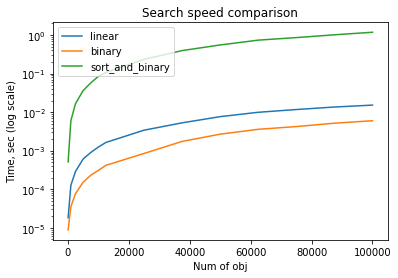

In [92]:
import matplotlib.pyplot as plt
plt.title('Search speed comparison')
plt.yscale('log')
plt.plot(x,y1,label="linear")
plt.plot(x,y2,label="binary")
plt.plot(x,y3,label="sort_and_binary")
plt.legend(loc='upper left') 
plt.xlabel('Num of obj')
plt.ylabel('Time, sec (log scale)')

Text(0, 0.5, 'Time, sec (log scale)')

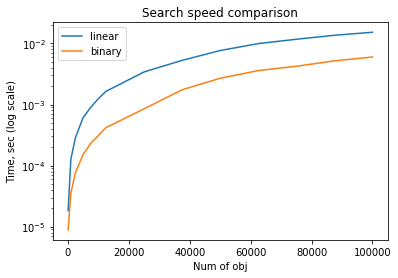

In [94]:
plt.title('Search speed comparison')
plt.yscale('log')
plt.plot(x,y1,label="linear")
plt.plot(x,y2,label="binary")
plt.legend(loc='upper left') 
plt.xlabel('Num of obj')
plt.ylabel('Time, sec (log scale)')

Text(0, 0.5, 'Time, sec')

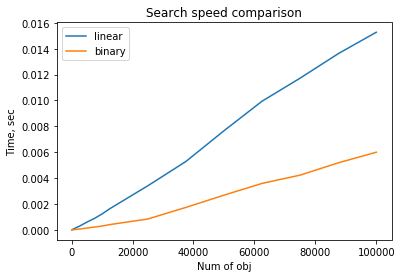

In [95]:
plt.title('Search speed comparison')
plt.plot(x,y1,label="linear")
plt.plot(x,y2,label="binary")
plt.legend(loc='upper left') 
plt.xlabel('Num of obj')
plt.ylabel('Time, sec')

### Рассмотрим вариант с defaultdict (аналог multimap)

In [18]:
y1=[]
y2=[]
y3=[]
y4=[]
x=[]
from collections import defaultdict
def test_mp(num):
    # принимает num - количество объектов, генерирует num объктов и засекает по 8 раз время поиска для каждого из четырех вариантов
    # (с defaultdict) и добавляет среднее значение времени в массивы y1, y2, y3 и y4, в массив x добавляется количество объектов
    k=0
    t1=[]
    t2=[]
    t3=[]
    t4=[]
    while k<8:
        sp1 = generate(num)
        sp2=[]
        for i in range(len(sp1)):
            sp2.append(sp1[i])
        
        mp = defaultdict(list) # создаем словарь
        for i in range(num):
            mp[sp1[i].Department].append(sp1[i])
    
        start_time = time.time()
        sp = mp['Редакция']
        t3.append(time.time() - start_time)
        
        start_time = time.time()
        linear_search(sp1,"Department","Редакция")
        t1.append(time.time() - start_time)
        
        merge_sort(sp2)
        start_time = time.time()
        binary_search(sp2,"Department","Редакция")
        t2.append(time.time() - start_time)
        
        start_time = time.time()
        sort_and_binary_search(sp2,"Department","Редакция")
        t4.append(time.time() - start_time)
        
        k=k+1
        
    y1.append(sum(t1)/len(t1))
    y2.append(sum(t2)/len(t2))
    y3.append(sum(t3)/len(t3))
    y4.append(sum(t4)/len(t4))
    x.append(num)  

In [19]:
test_mp(100)
test_mp(1000)
test_mp(2500)
test_mp(5000)
test_mp(7500)
test_mp(10000)
test_mp(12500)
test_mp(25000)
test_mp(37500)
test_mp(50000)
test_mp(62500)
test_mp(75000)
test_mp(87500)
test_mp(100000)

Text(0, 0.5, 'Time, sec (log scale)')

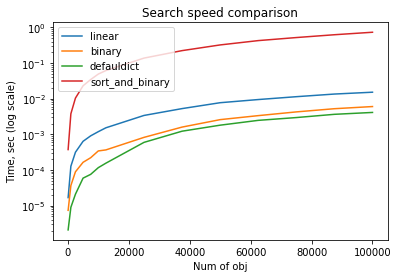

In [20]:
import matplotlib.pyplot as plt
plt.title('Search speed comparison')
plt.yscale('log')
plt.plot(x,y1,label="linear")
plt.plot(x,y2,label="binary")
plt.plot(x,y3,label="defauldict")
plt.plot(x,y4,label="sort_and_binary")
plt.legend(loc='upper left') 
plt.xlabel('Num of obj')
plt.ylabel('Time, sec (log scale)')

Text(0, 0.5, 'Time, sec')

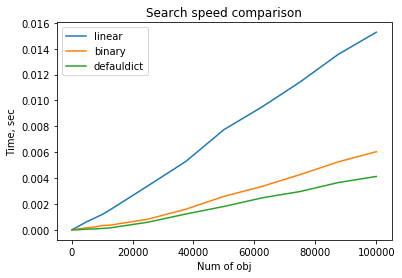

In [21]:
plt.title('Search speed comparison')
plt.plot(x,y1,label="linear")
plt.plot(x,y2,label="binary")
plt.plot(x,y3,label="defauldict")
plt.legend(loc='upper left') 
plt.xlabel('Num of obj')
plt.ylabel('Time, sec')

### Вывод

### Как видно наилучший по времени - вариант с defaultdict, затем бинарный поиск на заранее отсортированном массиве, затем идет прямой поиск и самый худший - сортировка + бинарный поиск